# Project Information

It is a very basic analytics project for beginners to understand how to explore data to get some insights using python

- Library used - Pandas

- Data - https://raw.githubusercontent.com/arora123/Data/master/emp-data.csv

- Data Description - Name, Gender, Department, Salary, Location & Ratings of 1015 employees [All column names are self explanatory]

- Objectives -
1. How many Males/Females are there in the entire organization?
2. How many Males/Females are there in the each department or for each location?
3. For which department is the average Pay highest?
4. For which location is the average Pay highest?
5. What percentage of employees received good & very good rating? What about poor & very poor rating? and average rating?
6. Compute gender pay gap for each department. Interpret
7. Compute gender pay gap for each location. Interpret



# Additional Exercises:

1. Use visualization to understand & explore data
2. Use statistical methods to explore the relationship/association between the variables
- gender & location
- gender & department
- gender & rating
- gender & salary
- location & salary
- department & salary

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
df=pd.read_csv(' https://raw.githubusercontent.com/arora123/Data/master/emp-data.csv')
df.head()


ModuleNotFoundError: No module named 'pandas'

In [ ]:
#How many Males/Females are there in the entire organization?
gender_count=df['Gender'].value_counts()
gender_count

,count
Gender,
Male,501
Female,471


In [ ]:
#How many Males/Females are there in the each department or for each location?
gender_count_by_department=df.groupby('Department')['Gender'].value_counts()
print(gender_count_by_department)


Department                Gender
Accounting                Male      40
                          Female    30
Business Development      Female    42
                          Male      38
Engineering               Male      38
                          Female    38
Human Resources           Female    44
                          Male      39
Legal                     Male      51
                          Female    36
Marketing                 Male      35
                          Female    33
Product Management        Male      49
                          Female    42
Research and Development  Female    39
                          Male      34
Sales                     Male      41
                          Female    38
Services                  Female    42
                          Male      38
Support                   Male      43
                          Female    37
Training                  Male      40
                          Female    38
Name: count, dtype: int64


In [ ]:
#How many Males/Females are there in the each department or for each location?
gender_count_by_location=df.groupby('Loc')['Gender'].value_counts().unstack()
print(gender_count_by_location)

Gender       Female  Male
Loc                      
Bellevue        127   135
Los Angeles     176   194
Wellington      168   172


In [ ]:
#For which department is the average Pay highest?
df['Salary']=pd.to_numeric(df['Salary'],errors='coerce')
missing_values=df['Salary'].isnull().sum()
print(missing_values)
avg_pay_department=df.groupby('Department')['Salary'].mean()
if not avg_pay_department.isnull().all:
  highest_avg_pay_department=avg_pay_department.idxmax()
  print(highest_avg_pay_department)
else:
    print('No valid data')


1015
No valid data


In [ ]:
#For which location is the average Pay highest?
avg_pay_by_location=df.groupby ('Loc')['Salary'].mean()
print(avg_pay_by_location)
highest_paid_location=avg_pay_by_location.idxmax()
print(highest_paid_location)

Loc
Bellevue      NaN
Los Angeles   NaN
Wellington    NaN
Name: Salary, dtype: float64
nan


<ipython-input-44-4de202f938c3>:4: FutureWarning: The behavior of Series.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  highest_paid_location=avg_pay_by_location.idxmax()


In [ ]:
#What percentage of employees received good & very good rating? What about poor & very poor rating? and average rating?
rating_percentages=df['Rating'].value_counts(normalize=True)*100
print(rating_percentages)

Rating
Average      45.418719
Good         18.817734
Poor         13.201970
Very Good     9.162562
Not Rated     7.783251
Very Poor     5.615764
Name: proportion, dtype: float64


In [ ]:
#Compute gender pay gap for each department. Interpret
def gender_pay_gap(group):
  male_avg=group[group,['Gender']=='Male']['Salary'].mean()
  female_avg=group[group,['Gender']=='Female']['Salary'].mean()
  return (male_avg-female_avg)/male_avg*100
  pay_gap_by_department=df.groupby('Department').apply(calculate_pay_gap)
  print(pay_gap_by_department)


In [ ]:
#Compute gender pay gap for each location. Interpret

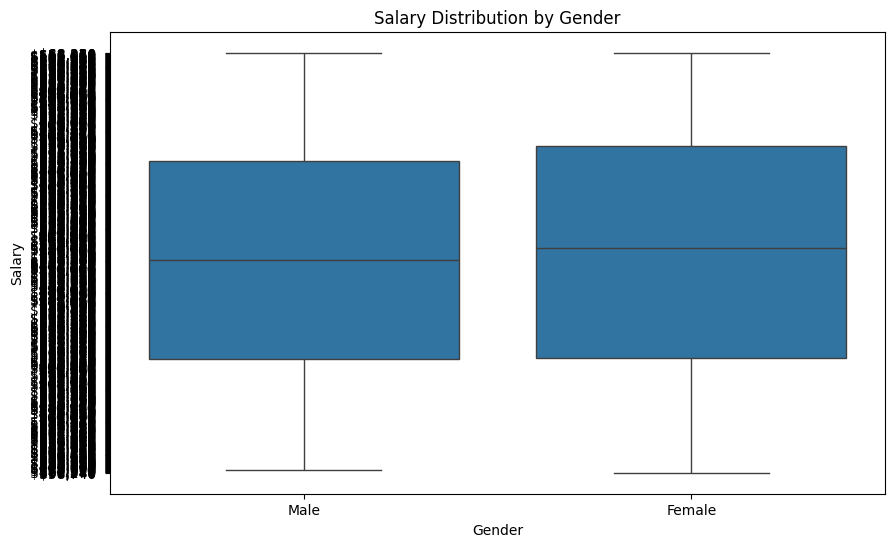

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
plt.figure(figsize=(10,6))
sns.boxplot(x='Gender',y='Salary',data=df)
plt.title('Salary Distribution by Gender')
plt.show()

In [ ]:
from scipy import stats
#gender and locattion
gender_location_crosstab=pd.crosstab(df['Gender'],df['Loc'])
chi2,p,dof,expected=stats.chi2_contingency(gender_location_crosstab)
print(f'chi2={chi2},p={p}')
#gender and department
gender_department_crosstab=pd.crosstab(df['Gender'],df['Department'])
chi2,p,dof,expected=stats.chi2_contingency(gender_department_crosstab)
print(f'chi2={chi2},p={p}')
#gender and rating
gender_rating_crosstab=pd.crosstab(df['Gender'],df['Rating'])
chi2,p,dof,expected=stats.chi2_contingency(gender_rating_crosstab)
print(f'chi2={chi2},p={p}')
#gender and salary
male_salary=df[df['Gender']=='Male']['Salary']
female_salary=df[df['Gender']=='Female']['Salary']
t_statistic,p_value=stats.ttest_ind(male_salary,female_salary)
print(f't_statistic={t_statistic},p_value={p_value}')
#location and salary
location_salary_anova=df.groupby('Loc')['Salary'].mean()
print(location_salary_anova)
#department and salary
department_salary_anova=df.groupby('Department')['Salary'].mean()
print(department_salary_anova)



chi2=0.24131325713190319,p=0.8863382505836238
chi2=5.504004561132479,p=0.9043284554295319
chi2=7.842717932420495,p=0.16511942834041662
t_statistic=nan,p_value=nan
Loc
Bellevue      NaN
Los Angeles   NaN
Wellington    NaN
Name: Salary, dtype: float64
Department
Accounting                 NaN
Business Development       NaN
Engineering                NaN
Human Resources            NaN
Legal                      NaN
Marketing                  NaN
Product Management         NaN
Research and Development   NaN
Sales                      NaN
Services                   NaN
Support                    NaN
Training                   NaN
Name: Salary, dtype: float64
